<a href="https://colab.research.google.com/github/davip99/Proyecto-Luca/blob/main/Proyecto.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PROYECTO LUCA - GRUPO 04

## Indice

## Sumario

## Resumen

## Informes

### Listado de los juegos:
Para poder trabajar con una base de datos, lo primero que debe hacerse es cargar dicha base de datos

In [ ]:
from google.colab import files
files.upload()

#### Todos los juegos
El siguiente código mostrará los juegos guardados en la base de datos

In [ ]:
import pandas as pd
df = pd.read_csv("src/csv/vgsales.csv")
print(df["Name"])

#### Solo 25 juegos
El siguiente código mostrará los 25 primeros juegos guardados en la base de datos

In [ ]:
print(df["Name"].head(25))

#### Con todas las columnas
El siguiente código mostrará la lista completa de juegos guardados en la base de datos

In [ ]:
print(df)

#### Todas las columnas menos las de ventas


In [ ]:
print(df.iloc[:, [0, 1, 2, 3, 4, 5]])

#### Ordenados por género

In [ ]:
print(df.sort_values(by="Genre"))

### Listados filtrados

#### Juegos de Nintendo

In [ ]:
print(df[df.Publisher == 'Nintendo'][['Name', 'Publisher']])

#### Juegos del siglo XX

In [ ]:
juegos_anteriores_2000 = df[df["Year"] < 2000]
for nombre in juegos_anteriores_2000["Name"]:
    print(nombre)

#### Juegos lanzados en años pares

In [ ]:
print(df[df["Year"]%2==0])

### Listado de ventas

#### Top 15 juegos más vendidos del mundo

In [ ]:
top = df.sort_values(by='Global_Sales', ascending=False).head(15)
print(top[['Rank', 'Name', 'Global_Sales']])

In [ ]:
import matplotlib.pyplot as plt

# Crea un gráfico de barras
plt.figure(figsize=(12, 6))
plt.bar(top['Name'], top['Global_Sales'], color='skyblue')
plt.xlabel('Juego')
plt.ylabel('Ventas Globales')
plt.title('Top 15 Juegos Más Vendidos en el Mundo')
plt.xticks(rotation=45, ha='right')  # Ajusta la rotación de las etiquetas del eje x para mejorar la legibilidad
plt.tight_layout()

# Muestra el gráfico
plt.show()

#### Top 5 Juegos más vendidos por región

In [ ]:
top_na = df.sort_values(by='NA_Sales', ascending=False).head(5)
top_eu = df.sort_values(by='EU_Sales', ascending=False).head(5)
top_jp = df.sort_values(by='JP_Sales', ascending=False).head(5)
top_oth = df.sort_values(by='Other_Sales', ascending=False).head(5)
print(top_na[['Rank', 'Name', 'NA_Sales']],
      "\n", top_eu[['Rank', 'Name', 'EU_Sales']],
      "\n", top_jp[['Rank', 'Name', 'JP_Sales']],
      "\n", top_oth[['Rank', 'Name', 'Other_Sales']])

#### Juegos con media de ventas en Europa por encima de la media en Europa

In [ ]:
import numpy as np
media_eu = np.mean(df.EU_Sales)
print(df[df.EU_Sales > media_eu])

#### Total ventas agrupadas por región y categoría

In [ ]:
generos = df.groupby(["Genre"])[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales']].sum()
print(generos)

#### Sumas de las ventas por región y porcentaje correspondiente

In [ ]:
ventas_por_region = df[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales']].sum()
porcentaje_por_region = (ventas_por_region / df['Global_Sales'].sum()) * 100
result = pd.DataFrame({
    'Suma_ventas': ventas_por_region,
    'Porcentaje': porcentaje_por_region
})
print(result)

#### Total ventas por región y año

In [ ]:
ventas = df.groupby(['Year'])[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales']].sum()
print(ventas)

#### Número de juegos de cada editor (gráfico)

In [ ]:
from collections import Counter
import matplotlib.pyplot as plt


# Eliminamos los juegos que aparecen más de una vez
df_sin_duplicados = df.drop_duplicates(subset=['Name'])


# Contamos las veces que aparece cada editor
recuento = Counter(list(df_sin_duplicados.Publisher))
nombres = list(recuento.keys())
valores = list(recuento.values())

#Esto no lo entendí muy bien pero si no lo hago el gráfico da error
editores = []
for nombre in nombres:
  if isinstance(nombre, str):
    editores.append(nombre)
  else:
    editores.append(str(nombre))


# Creamos el grafico
plt.figure(figsize=(12, 6))
plt.bar(editores, valores, color='blue')
plt.xlabel('Editores')
plt.ylabel('N de juegos')
plt.title('Juegos publicados por cada editor')
plt.xticks([])
plt.show()

datata = pd.DataFrame(editores, valores)
print(datata.head())

#### Total ventas por región y editor

In [ ]:
ventas = df.groupby(['Publisher'])[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales']].sum()
print(ventas)

#### Ventas ordenadas por plataforma y región

#### Ventas por género (gráfico)

In [ ]:
ventas_genero = df.groupby(['Genre'])[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales']].sum()
print(ventas_genero)

In [ ]:
import matplotlib.pyplot as plt

ventas_genero.plot(kind='bar', stacked=False, figsize=(12,8))
plt.xlabel('Genre')
plt.ylabel('Ventas Globales')
plt.xticks(rotation=45, ha='right')  # Ajusta la rotación de las etiquetas del eje x para mejorar la legibilidad
plt.tight_layout()

# Muestra el gráfico
plt.show()

#### Indicar cual es el juego más popular, el género, el editor y la plataforma de todos los tiempos | siglo XX | siglo XXI

In [ ]:
df_xx = df[df['Year'] < 2000]
df_xxi = df[df['Year'] >= 2000]
juego_popular_xx = df_xx[df_xx['Global_Sales'] == df_xx['Global_Sales'].max()]
juego_popular_xxi = df_xxi[df_xxi['Global_Sales'] == df_xxi['Global_Sales'].max()]
print(juego_popular_xx[['Name', 'Platform', 'Year', 'Genre', 'Publisher', 'Global_Sales']], 
      "\n\n", juego_popular_xxi[['Name', 'Platform', 'Year', 'Genre', 'Publisher', 'Global_Sales']])

#### Tendencias de ventas de videojuegos a lo largo de los años

#### Gráfico que relacione las ventas globales y la plataforma. Interesante que aparezcan desglosados por genero (histograma estratificado)

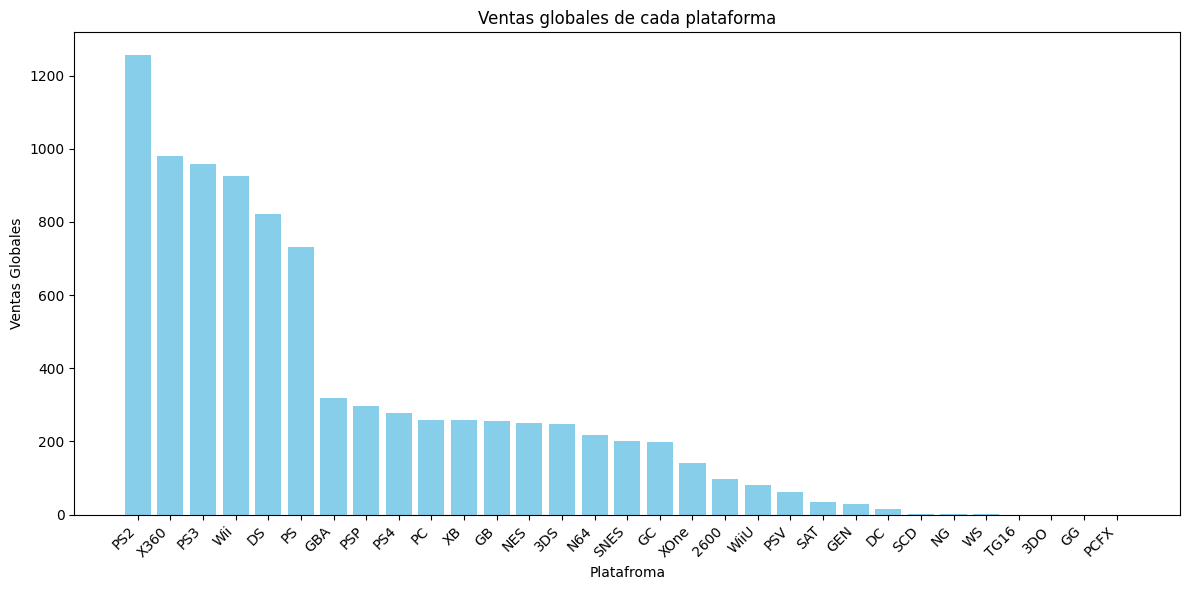

In [25]:
juegos_por_plataforma = df.groupby('Platform')['Global_Sales'].sum().sort_values(ascending = False)


# Crea un gráfico de barras
plt.figure(figsize=(12, 6))
plt.bar(juegos_por_plataforma.index, juegos_por_plataforma, color='skyblue')
plt.xlabel('Platafroma')
plt.ylabel('Ventas Globales')
plt.title('Ventas globales de cada plataforma')
plt.xticks(rotation=45, ha='right')  # Ajusta la rotación de las etiquetas del eje x para mejorar la legibilidad
plt.tight_layout()

# Muestra el gráfico
plt.show()

#### Los 10 años con más ventas en Japón (gráfico)

In [ ]:
ventas_por_año = df.groupby('Year')['JP_Sales'].sum()
top_ventas = ventas_por_año.sort_values(ascending = False).head(10)
print(top_ventas)

In [ ]:
plt.bar(top_ventas.index.astype(str), top_ventas)
plt.xlabel('Anio')
plt.ylabel('Ventas en Japón')
plt.xticks(rotation=45, ha='right')  # Ajusta la rotación de las etiquetas del eje x para mejorar la legibilidad
plt.tight_layout()

# Muestra el gráfico
plt.show()

#### Tipo de juego más vendido en cada región

In [ ]:
genero_eu = df.groupby('Genre')['EU_Sales'].sum().sort_values(ascending = False)
print(f'El tipo de juego más vendido en EU son los de {genero_eu.index[0]} con {genero_eu[0]} ventas')

genero_jp = df.groupby('Genre')['JP_Sales'].sum().sort_values(ascending = False)
print(f'El tipo de juego más vendido en Japón son los de {genero_jp.index[0]} con {genero_jp[0]} ventas')

genero_na = df.groupby('Genre')['NA_Sales'].sum().sort_values(ascending = False)
print(f'El tipo de juego más vendido en Norteamércia son los de {genero_na.index[0]} con {genero_na[0]} ventas')

genero_otros = df.groupby('Genre')['Other_Sales'].sum().sort_values(ascending = False)
print(f'El tipo de juego más vendido en el resto de regiones son los de {genero_otros.index[0]} con {genero_otros[0]} ventas')

#### Listado del editor que más juegos ha lanzado en cada año

## Análisis de datos exploratorio

### ¿Existe alguna correlación en el siglo XX para los juegos más vendidos por región?

In [ ]:
dfXX = df[df.Year < 2001]
corr_matrix_XX = dfXX.corr(numeric_only=True)
print(f"La matriz de correlaciones de los datos es:\n{corr_matrix_XX}")

En el caso de los juegos publicados en el siglo XX, los datos no muestran correlaciones altas entre ventas globales y el año de publicación, lo que parece indicar que en ese periodo no importaba en qué año saliese un juego ya que no influye en sus ventas. El rango (determinado por las ventas globales) y las ventas por región (que se utilizan para construir la variable ventas globales) presentan correlaciones de medias a altas por motivos evidentes. \\
Las variables nominales no pueden ser correlacionadas debido a que carecen de valor numérico y, por tanto, de métrica. \\
La región de Japón y la variable "Otras regiones" correlacionan de manera notablemente menor, por lo que las ventas japonesas serían el peor predictor de las ventas en otras regiones y podría ser objeto de futuros análisis.

#### ¿Y para el siglo XXI?

In [ ]:
dfXXI = df[df.Year > 2000]
corr_matrix_XXI = dfXXI.corr(numeric_only=True)
print(f"La matriz de correlaciones de los datos es:\n{corr_matrix_XXI}")

Los resultados son similares a los del siglo pasado. La mayor diferencia apreciable a simple vista es la bajada en la relación entre ventas globales y ventas en la región nipona. La correlación de Pearson entre ambas variables es menor en el siglo XXI que en el XX y podría indicar que los juegos que triunfan en Japón no siempre lo hacen en el esto del mundo. Además, la relación entre el año de publicación y las ventas globales es tan baja que los datos no muestran ningún tipo de relación

#### ¿Es la misma tendencia si tomamos los datos de todos los años?

In [ ]:
corr_matrix = df.corr(numeric_only=True)
print(f"La matriz de correlaciones de los datos es:\n{corr_matrix}")

### ¿Hay información incorrecta o nula?

#### Si es así, ¿desvirtúa el resultado?

### ¿Cuáles son los 5 años en los cuales aparecieron más juegos?

#### ¿Se puede encontrar una explicación?

#### ¿Y si desglosamos esos 5 años por género?

### ¿Qué genero ha sido el más versionado en algún momento? (referido a datos de un año)

#### ¿Tiene sentido?

### ¿Se corresponde de alguna manera los editores que más venden con los que más juegos lanzan?

#### ¿existe alguna correlación?